In [104]:
from numras import Numras
from optimizers import Adam as numras_adam
from optimizers import Adamax as numras_adamax
from optimizers import RmsProp as numras_RmsProp

In [105]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from tensorflow.keras.datasets import mnist, fashion_mnist
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import sklearn.datasets
import math
from numba import jit

In [106]:
# np.random.seed(1)

(trainX, trainY), (testX, testY) = fashion_mnist.load_data()
enc = OneHotEncoder(sparse=False, categories='auto')

X = trainX.reshape(trainX.shape[0], trainX.shape[1]*trainX.shape[2]).T
Y = trainY.reshape(-1, trainY.shape[0])
Y = enc.fit_transform(Y.reshape(-1,1)).T
test_x = testX.reshape(testX.shape[0], testX.shape[1]*testX.shape[2]).T
test_y = testY.reshape(-1, testY.shape[0])
test_y = enc.transform(test_y.reshape(-1, 1)).T

X = X / 255
test_x = test_x / 255

print(f"X shape - {X.shape}")
print(f"Y shape - {Y.shape}")
print(f"test_x shape - {test_x.shape}")
print(f"test_y shape - {test_y.shape}")

X shape - (784, 60000)
Y shape - (10, 60000)
test_x shape - (784, 10000)
test_y shape - (10, 10000)


# Visualizing the Dataset

In [107]:
class_names = ['Tshirt','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

<function matplotlib.pyplot.show(*args, **kw)>

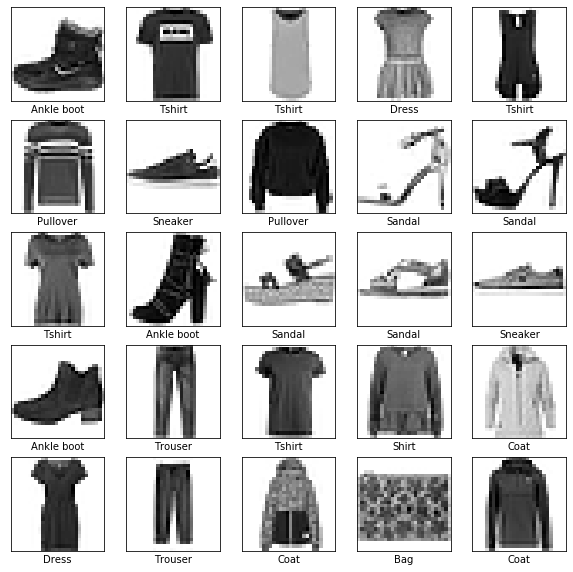

In [108]:
plt.figure(figsize= (10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(trainX[i],cmap=plt.cm.binary)
    plt.xlabel(class_names[trainY[i]])
plt.show

# ADAMAX OPTIMIZER 

In [109]:
layer_dims = [784,64,10]

activations = ["relu","softmax"]

opt = numras_adamax()

numras_model = Numras(layer_dims,activations,parameter_type="he",optimizer=opt)

numras_history = numras_model.fit(X,Y,test_x,test_y,0.01,10,batch_size = 1024)

Epoch 1 Train Accuracy ==  76.03333333333333 Test Accuracy ==  75.05
Epoch 2 Train Accuracy ==  80.05333333333333 Test Accuracy ==  79.0
Epoch 3 Train Accuracy ==  81.50333333333334 Test Accuracy ==  80.47999999999999
Epoch 4 Train Accuracy ==  82.47666666666666 Test Accuracy ==  81.39
Epoch 5 Train Accuracy ==  83.195 Test Accuracy ==  82.19999999999999
Epoch 6 Train Accuracy ==  83.55166666666666 Test Accuracy ==  82.46
Epoch 7 Train Accuracy ==  84.09166666666667 Test Accuracy ==  83.06
Epoch 8 Train Accuracy ==  84.505 Test Accuracy ==  83.06
Epoch 9 Train Accuracy ==  84.71499999999999 Test Accuracy ==  83.33
Epoch 10 Train Accuracy ==  85.16833333333334 Test Accuracy ==  83.8


In [110]:
from keras.layers import Dense, Flatten

from keras.models import Sequential

from keras.initializers import glorot_normal, glorot_uniform, he_uniform, he_normal

from keras.optimizers import Adam as keras_adam

from keras.optimizers import Adamax as keras_adamax

from keras.optimizers import RMSprop as keras_Rms_prop

from keras.optimizers import Adagrad as keras_adagrad

from keras.optimizers import SGD as keras_sgd

model = Sequential()
model.add(Dense(64, activation="relu"))
model.add(Dense(10, activation = "softmax"))


opt1 = keras_adamax(learning_rate=0.001)

model.compile(optimizer=opt1,loss="categorical_crossentropy",metrics=["accuracy"],initializers=he_normal())

history = model.fit(X.T,Y.T,validation_data=(test_x.T,test_y.T),epochs=10,batch_size = 1024)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 1s 12us/step - loss: 1.1499 - accuracy: 0.6393 - val_loss: 0.7823 - val_accuracy: 0.7352
Epoch 2/10
60000/60000 [==============================] - 1s 12us/step - loss: 0.6924 - accuracy: 0.7696 - val_loss: 0.6517 - val_accuracy: 0.7808
Epoch 3/10
60000/60000 [==============================] - 1s 12us/step - loss: 0.6020 - accuracy: 0.8004 - val_loss: 0.5942 - val_accuracy: 0.8034
Epoch 4/10
60000/60000 [==============================] - 1s 12us/step - loss: 0.5531 - accuracy: 0.8167 - val_loss: 0.5593 - val_accuracy: 0.8095
Epoch 5/10
60000/60000 [==============================] - 1s 13us/step - loss: 0.5220 - accuracy: 0.8263 - val_loss: 0.5371 - val_accuracy: 0.8200
Epoch 6/10
60000/60000 [==============================] - 1s 12us/step - loss: 0.4996 - accuracy: 0.8331 - val_loss: 0.5177 - val_accuracy: 0.8240
Epoch 7/10
60000/60000 [==============================] - 1s 12us/st

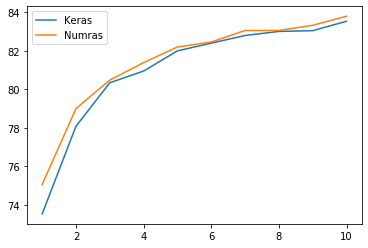

In [111]:
sns.lineplot(y=np.multiply(history.history["val_accuracy"], 100),x=range(1,11),label="Keras")
sns.lineplot(y=numras_history["val_accuracy"],x=range(1,11), label="Numras")

# Adam Optimizer

In [112]:
layer_dims = [784,64,10]

activations = ["relu","softmax"]

opt = numras_adam()

numras_model = Numras(layer_dims,activations,parameter_type="he",optimizer=opt)

numras_history = numras_model.fit(X,Y,test_x,test_y,0.01,10,batch_size = 1024)

Epoch 1 Train Accuracy ==  80.02 Test Accuracy ==  78.99000000000001
Epoch 2 Train Accuracy ==  82.82666666666667 Test Accuracy ==  81.86
Epoch 3 Train Accuracy ==  84.32833333333333 Test Accuracy ==  83.22
Epoch 4 Train Accuracy ==  85.23333333333333 Test Accuracy ==  83.96000000000001
Epoch 5 Train Accuracy ==  85.69 Test Accuracy ==  84.35000000000001
Epoch 6 Train Accuracy ==  86.16 Test Accuracy ==  84.73
Epoch 7 Train Accuracy ==  86.46333333333334 Test Accuracy ==  85.13
Epoch 8 Train Accuracy ==  86.79666666666667 Test Accuracy ==  85.5
Epoch 9 Train Accuracy ==  87.265 Test Accuracy ==  85.61999999999999
Epoch 10 Train Accuracy ==  87.37666666666667 Test Accuracy ==  85.82


In [113]:
from keras.layers import Dense, Flatten

from keras.models import Sequential

from keras.initializers import glorot_normal, glorot_uniform, he_uniform, he_normal

from keras.optimizers import Adam as keras_adam

from keras.optimizers import Adamax as keras_adamax

from keras.optimizers import RMSprop as keras_Rms_prop

from keras.optimizers import Adagrad as keras_adagrad

from keras.optimizers import SGD as keras_sgd

model = Sequential()
model.add(Dense(64, activation="relu"))
model.add(Dense(10, activation = "softmax"))


opt1 = keras_adam(learning_rate=0.001)

model.compile(optimizer=opt1,loss="categorical_crossentropy",metrics=["accuracy"],initializers=he_normal())

history = model.fit(X.T,Y.T,validation_data=(test_x.T,test_y.T),epochs=10,batch_size = 1024)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 1s 12us/step - loss: 1.0000 - accuracy: 0.6757 - val_loss: 0.6521 - val_accuracy: 0.7767
Epoch 2/10
60000/60000 [==============================] - 1s 11us/step - loss: 0.5665 - accuracy: 0.8093 - val_loss: 0.5436 - val_accuracy: 0.8162
Epoch 3/10
60000/60000 [==============================] - 1s 11us/step - loss: 0.4958 - accuracy: 0.8339 - val_loss: 0.5018 - val_accuracy: 0.8296
Epoch 4/10
60000/60000 [==============================] - 1s 12us/step - loss: 0.4584 - accuracy: 0.8453 - val_loss: 0.4743 - val_accuracy: 0.8343
Epoch 5/10
60000/60000 [==============================] - 1s 12us/step - loss: 0.4361 - accuracy: 0.8518 - val_loss: 0.4646 - val_accuracy: 0.8394
Epoch 6/10
60000/60000 [==============================] - 1s 12us/step - loss: 0.4180 - accuracy: 0.8579 - val_loss: 0.4448 - val_accuracy: 0.8445
Epoch 7/10
60000/60000 [==============================] - 1s 12us/st

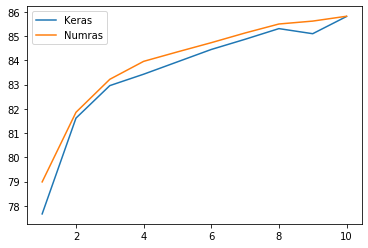

In [114]:
sns.lineplot(y=np.multiply(history.history["val_accuracy"], 100),x=range(1,11),label="Keras")
sns.lineplot(y=numras_history["val_accuracy"],x=range(1,11), label="Numras")

# RmsProp

In [115]:
layer_dims = [784,64,10]

activations = ["relu","softmax"]

opt = numras_RmsProp()

numras_model = Numras(layer_dims,activations,parameter_type="he",optimizer=opt)

numras_history = numras_model.fit(X,Y,test_x,test_y,0.01,10,batch_size = 1024)

Epoch 1 Train Accuracy ==  75.44166666666666 Test Accuracy ==  74.25
Epoch 2 Train Accuracy ==  79.75666666666666 Test Accuracy ==  78.56
Epoch 3 Train Accuracy ==  81.49166666666666 Test Accuracy ==  80.38
Epoch 4 Train Accuracy ==  82.17833333333333 Test Accuracy ==  81.02000000000001
Epoch 5 Train Accuracy ==  82.92666666666668 Test Accuracy ==  81.72
Epoch 6 Train Accuracy ==  83.485 Test Accuracy ==  82.33
Epoch 7 Train Accuracy ==  83.70833333333333 Test Accuracy ==  82.48
Epoch 8 Train Accuracy ==  84.09333333333333 Test Accuracy ==  82.69
Epoch 9 Train Accuracy ==  84.44166666666668 Test Accuracy ==  82.92
Epoch 10 Train Accuracy ==  84.74666666666667 Test Accuracy ==  83.35000000000001


In [116]:
from keras.layers import Dense, Flatten

from keras.models import Sequential

from keras.initializers import glorot_normal, glorot_uniform, he_uniform, he_normal

from keras.optimizers import Adam as keras_adam

from keras.optimizers import Adamax as keras_adamax

from keras.optimizers import RMSprop as keras_Rms_prop

from keras.optimizers import Adagrad as keras_adagrad

from keras.optimizers import SGD as keras_sgd

model = Sequential()
model.add(Dense(64, activation="relu"))
model.add(Dense(10, activation = "softmax"))


opt1 = keras_Rms_prop(learning_rate=0.001)

model.compile(optimizer=opt1,loss="categorical_crossentropy",metrics=["accuracy"],initializers=he_normal())

history = model.fit(X.T,Y.T,validation_data=(test_x.T,test_y.T),epochs=10,batch_size = 1024)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 1s 11us/step - loss: 0.9605 - accuracy: 0.6749 - val_loss: 0.6849 - val_accuracy: 0.7624
Epoch 2/10
60000/60000 [==============================] - 1s 12us/step - loss: 0.6070 - accuracy: 0.7879 - val_loss: 0.5983 - val_accuracy: 0.7803
Epoch 3/10
60000/60000 [==============================] - 1s 12us/step - loss: 0.5318 - accuracy: 0.8161 - val_loss: 0.5330 - val_accuracy: 0.8086
Epoch 4/10
60000/60000 [==============================] - 1s 11us/step - loss: 0.4901 - accuracy: 0.8305 - val_loss: 0.5200 - val_accuracy: 0.8169
Epoch 5/10
60000/60000 [==============================] - 1s 11us/step - loss: 0.4679 - accuracy: 0.8345 - val_loss: 0.5193 - val_accuracy: 0.8174
Epoch 6/10
60000/60000 [==============================] - 1s 11us/step - loss: 0.4471 - accuracy: 0.8433 - val_loss: 0.4758 - val_accuracy: 0.8308
Epoch 7/10
60000/60000 [==============================] - 1s 11us/st

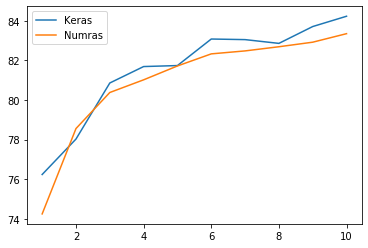

In [117]:
sns.lineplot(y=np.multiply(history.history["val_accuracy"], 100),x=range(1,11),label="Keras")
sns.lineplot(y=numras_history["val_accuracy"],x=range(1,11), label="Numras")